In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score


In [9]:
# Load preprocessed arrays from notebook 1
X_train = np.load("../data/X_train.npy")
X_test  = np.load("../data/X_test.npy")
y_train = np.load("../data/y_train.npy")
y_test  = np.load("../data/y_test.npy")

print("Shapes:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)


Shapes:
X_train: (398, 30) X_test: (171, 30)
y_train: (398,) y_test: (171,)


In [10]:
# Linear Regression as baseline
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_train = lr_model.predict(X_train)
y_pred_test  = lr_model.predict(X_test)


In [11]:
# Regression metrics
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test  = mean_squared_error(y_test, y_pred_test)
r2_train  = r2_score(y_train, y_pred_train)
r2_test   = r2_score(y_test, y_pred_test)

print(f"Train MSE: {mse_train:.4f}, R2: {r2_train:.4f}")
print(f"Test MSE: {mse_test:.4f}, R2: {r2_test:.4f}")


Train MSE: 0.0478, R2: 0.7952
Test MSE: 0.0917, R2: 0.6082


In [12]:
# Linear Regression outputs continuous values; threshold at 0.5 to classify
y_pred_class = (y_pred_test >= 0.5).astype(int)

acc = accuracy_score(y_test, y_pred_class)
cm  = confusion_matrix(y_test, y_pred_class)
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)

print(f"Accuracy: {acc:.4f}")
print(f"TPR: {TPR:.4f}, TNR: {TNR:.4f}, FPR: {FPR:.4f}, FNR: {FNR:.4f}")
print("Confusion Matrix:\n", cm)


Accuracy: 0.9298
TPR: 0.9907, TNR: 0.8281, FPR: 0.1719, FNR: 0.0093
Confusion Matrix:
 [[ 53  11]
 [  1 106]]


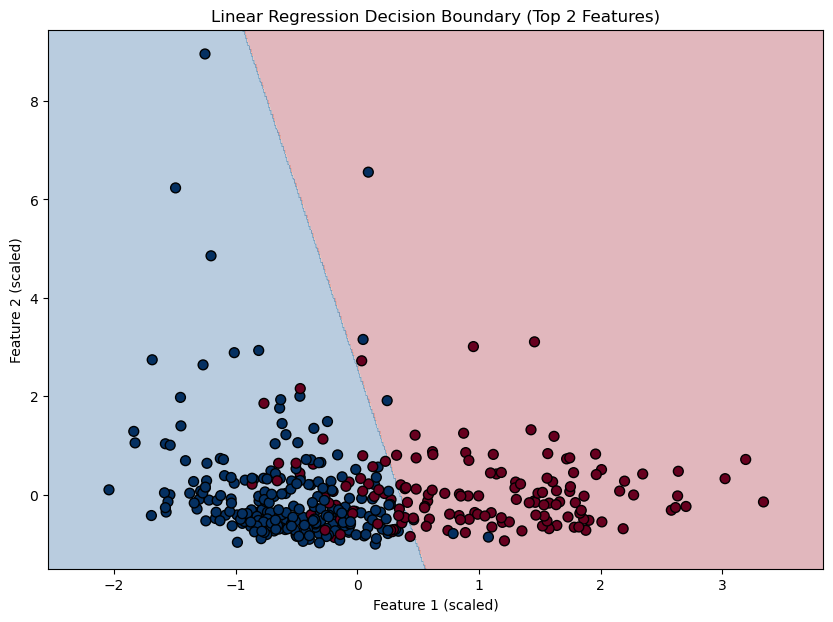

In [13]:
# Select two features for visualization
feature_indices = [0, 19]  # e.g., 'mean radius' & 'fractal dimension worst'
X_plot_train = X_train[:, feature_indices]
X_plot_test  = X_test[:, feature_indices]

# Retrain Linear Regression on two features
lr_plot = LinearRegression()
lr_plot.fit(X_plot_train, y_train)

# Meshgrid for decision boundary
x_min, x_max = X_plot_train[:,0].min()-0.5, X_plot_train[:,0].max()+0.5
y_min, y_max = X_plot_train[:,1].min()-0.5, X_plot_train[:,1].max()+0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = lr_plot.predict(np.c_[xx.ravel(), yy.ravel()])
Z_class = (Z >= 0.5).astype(int).reshape(xx.shape)

# Plot
plt.figure(figsize=(10,7))
plt.contourf(xx, yy, Z_class, alpha=0.3, cmap=plt.cm.RdBu)
plt.scatter(X_plot_train[:,0], X_plot_train[:,1], c=y_train, edgecolor='k', cmap=plt.cm.RdBu, s=50)
plt.title("Linear Regression Decision Boundary (Top 2 Features)")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()


In [14]:
import joblib
joblib.dump(lr_model, "../saved_models/linear_regression_model.pkl")
print("Linear Regression model saved!")


Linear Regression model saved!
